In [1]:
import numpy as np
from numpy import outer, trace, dot, vdot, pi, log2, exp, sin, cos, sqrt, sign, diag, linspace, arange, array, inf, zeros, eye, arccos, arcsin, arctan, mean, std, concatenate, kron, sign, ceil, log, unique
import pickle
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family']='serif'
matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rc('text', usetex=True)

In [2]:
def qfi_lincomb(a, p, n):
    d = 2**n
    x = 1 - d + p*d
    y = 1 - p*d
    num = a*x*y - 2*p*(1 - x) + d - 1
    den = (1 - a)*(1 - a*x)*(1 - a*y)
    return num/den

def cfi_lincomb(a, p, n, m):
    d_m_inv = 1/2**m
    if m == n:
        p1 = p
        p2 = (1 - p)
    elif m < n:
        p1 = 1
        p2 = 0
    t1 = (p1 - d_m_inv)**2/(a*p1 + (1 - a)*d_m_inv)
    t2 = (p2 - d_m_inv)**2/(a*p2 + (1 - a)*d_m_inv)
    t3 = (1 - 2*d_m_inv)/(1 - a)
    return t1 + t2 + t3

def var_lincomb(a, p, n, m):
    Ich = cfi_lincomb(1/2, p, n, m)
    if m == n:
        d = 2**n
        p1 = a*p + (1 - a)/d
        p2 = a*(1 - p) + (1 - a)/d
        p3 = (1 - a)/d*(d - 2)
        x1 = 1/2 + 2/Ich*(p - 1/d)/(p + 1/d)
        x2 = 1/2 + 2/Ich*(1 - p - 1/d)/(1 - p + 1/d)
        x3 = 1/2 - 2/Ich
    elif m < n:
        d = 2**m
        p1 = a + (1 - a)/d
        p2 = (1 - a)/d
        p3 = (1 - a)/d*(d - 2)
        x1 = 1/2 + 2/Ich*(1 - 1/d)/(1 + 1/d)
        x2 = 1/2 - 2/Ich
        x3 = 1/2 - 2/Ich
    expec = x1*p1 + x2*p2 + x3*p3
    expec_sq = x1**2*p1 + x2**2*p2 + x3**2*p3
    var = expec_sq - expec**2
    return var

In [3]:
n_inp = 8
n_copies= 1
n_runs = 10
w_ls = 1
w_var = 1e-4
dm_info = "ghz_pm"
r = 1/4
ansatz_name = "qcnn_schwinger"
ansatz_info = ""
U_info = "identity"

In [4]:
n_meas_list = [0]

path = f"/home/investigator/Work/qcnn-var/Results/linear_combination/"
info = f"{dm_info}-{ansatz_name}{ansatz_info}-U={U_info}-" + ("n=%d-c=%d-m=%s-r=%d-w_ls=%.1f-w_var=%.4f-p=%.2f" %(n_inp, n_copies, n_meas_list, n_runs, w_ls, w_var, p)).replace(" ", "")

with open(path + info + ".dict", 'rb') as fp:
    data_dict_loaded = pickle.load(fp)

labels_test = data_dict_loaded["labels_test"]
expecs_list_0 = data_dict_loaded["expecs_list"]
expecs_der_list_0 = data_dict_loaded["expecs_der_list"]
disps_list_0 = data_dict_loaded["disps_list"]
QFIs = data_dict_loaded["QFIs"]
CFIs_list_0 = data_dict_loaded["CFIs_list"]

bias_mean_0 =  np.mean((labels_test - expecs_list_0)**2, axis=0)
bias_std_0 =  np.std((labels_test - expecs_list_0)**2, axis=0)
disps_red_mean_0 = np.mean(disps_list_0/expecs_der_list_0**2, axis=0)
disps_red_std_0 = np.std(disps_list_0/expecs_der_list_0**2, axis=0)
CCRBs_mean_0 = np.mean(1/CFIs_list_0, axis=0)
CCRBs_std_0 = np.std(1/CFIs_list_0, axis=0)

/tmp/ipykernel_3626036/227032733.py:7: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data_dict_loaded = pickle.load(fp)


In [9]:
data_dict_loaded.keys()

dict_keys(['n', 'c', 'a', 'b', 'w_ls', 'w_var', 'labels_train', 'labels_test', 'n_runs', 'pars_list', 'expecs_list', 'expecs_der_list', 'CFIs_list', 'QFIs', 'disps_list', 'times_list', 'dm_info', 'ansatz_name', 'ansatz_info', 'note'])

In [5]:
n_meas_list = [0, 4]

path = f"/home/investigator/Work/qcnn-var/Results/linear_combination/"
info = f"{dm_info}-{ansatz_name}{ansatz_info}-U={U_info}-" + ("n=%d-c=%d-m=%s-r=%d-w_ls=%.1f-w_var=%.4f-p=%.2f" %(n_inp, n_copies, n_meas_list, n_runs, w_ls, w_var, p)).replace(" ", "")

with open(path + info + ".dict", 'rb') as fp:
    data_dict_loaded = pickle.load(fp)

labels_test = data_dict_loaded["labels_test"]
expecs_list_04 = data_dict_loaded["expecs_list"]
expecs_der_list_04 = data_dict_loaded["expecs_der_list"]
disps_list_04 = data_dict_loaded["disps_list"]
QFIs_04 = data_dict_loaded["QFIs"]
CFIs_list_04 = data_dict_loaded["CFIs_list"]

bias_mean_04 =  np.mean((labels_test - expecs_list_04)**2, axis=0)
bias_std_04 =  np.std((labels_test - expecs_list_04)**2, axis=0)
disps_red_mean_04 = np.mean(disps_list_04/expecs_der_list_04**2, axis=0)
disps_red_std_04 = np.std(disps_list_04/expecs_der_list_04**2, axis=0)
CCRBs_mean_04 = np.mean(1/CFIs_list_04, axis=0)
CCRBs_std_04 = np.std(1/CFIs_list_04, axis=0)

/tmp/ipykernel_3626036/581859974.py:7: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data_dict_loaded = pickle.load(fp)


In [6]:
n_meas_list = [0, 2, 4, 6]

path = f"/home/investigator/Work/qcnn-var/Results/linear_combination/"
info = f"{dm_info}-{ansatz_name}{ansatz_info}-U={U_info}-" + ("n=%d-c=%d-m=%s-r=%d-w_ls=%.1f-w_var=%.4f-p=%.2f" %(n_inp, n_copies, n_meas_list, n_runs, w_ls, w_var, p)).replace(" ", "")

with open(path + info + ".dict", 'rb') as fp:
    data_dict_loaded = pickle.load(fp)

labels_test = data_dict_loaded["labels_test"]
expecs_list_0246 = data_dict_loaded["expecs_list"]
expecs_der_list_0246 = data_dict_loaded["expecs_der_list"]
disps_list_0246 = data_dict_loaded["disps_list"]
QFIs_0246 = data_dict_loaded["QFIs"]
CFIs_list_0246 = data_dict_loaded["CFIs_list"]

bias_mean_0246 =  np.mean((labels_test - expecs_list_0246)**2, axis=0)
bias_std_0246 =  np.std((labels_test - expecs_list_0246)**2, axis=0)
disps_red_mean_0246 = np.mean(disps_list_0246/expecs_der_list_0246**2, axis=0)
disps_red_std_0246 = np.std(disps_list_0246/expecs_der_list_0246**2, axis=0)
CCRBs_mean_0246 = np.mean(1/CFIs_list_0246, axis=0)
CCRBs_std_0246 = np.std(1/CFIs_list_0246, axis=0)

/tmp/ipykernel_3626036/449454832.py:7: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data_dict_loaded = pickle.load(fp)


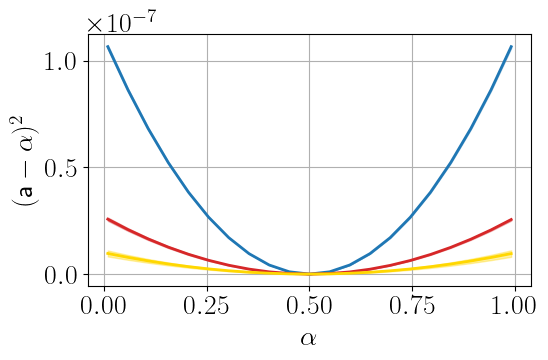

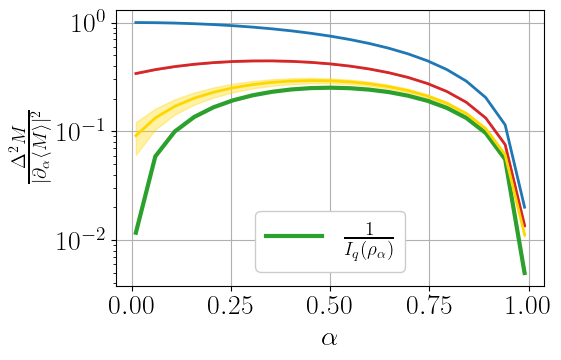

In [7]:
# file_info = r"schwinger-n=%d-c=%d-m=%s-w_ls=%.1f-w_var=%.4f" %(n_inp, n_copies, "[(0),(0,4),4]", w_ls, w_var)

plt.figure(figsize=(6, 4))
p0 = plt.plot(labels_test, bias_mean_0, linewidth=2)
p04 = plt.plot(labels_test, bias_mean_04, color="tab:red", linewidth=2)
p0246 = plt.plot(labels_test, bias_mean_0246, color="gold", linewidth=2)
f0 = plt.fill_between(labels_test, bias_mean_0 - bias_std_0, bias_mean_0 + bias_std_0, alpha=0.35, color="tab:blue")
f04 = plt.fill_between(labels_test, bias_mean_04 - bias_std_04, bias_mean_04 + bias_std_04, alpha=0.35, color="tab:red")
f0246 = plt.fill_between(labels_test, bias_mean_0246 - bias_std_0246, bias_mean_0246 + bias_std_0246, alpha=0.35, color="gold")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$(\mathsf{a} - \alpha)^2$")
# plt.legend()
plt.grid()
# plt.legend([(p0[0], f0), (p04[0], f04)], [r'$t=1$, MSE:%.2f'%mse_0, r'$t=2$, MSE:%.2f'%mse_04], framealpha=1)
# plt.legend([(p0[0], f0), (p04[0], f04), (phea4[0], fhea4)], [r'QCNN, $l=1$', r'QCNN, $l=2$', r'HEA, $l=4$'], framealpha=1, bbox_to_anchor=(0.75, 0.5), fontsize=19)
# plt.yscale("log")
plt.tight_layout()
# plt.savefig(path_fig + "bfgs-" + file_info + "-mean-est.pdf", transparent=True, bbox_inches='tight')
plt.show()

plt.figure(figsize=(6, 4))
p0 = plt.plot(labels_test, disps_red_mean_0, linewidth=2, zorder=10)
p04 = plt.plot(labels_test, disps_red_mean_04, linewidth=2, color="tab:red", zorder=10)
p0246 = plt.plot(labels_test, disps_red_mean_0246, linewidth=2, color="gold", zorder=10)
f0 = plt.fill_between(labels_test, disps_red_mean_0 - disps_red_std_0, disps_red_mean_0 + disps_red_std_0, alpha=0.35, zorder=9)
f04 = plt.fill_between(labels_test, disps_red_mean_04 - disps_red_std_04, disps_red_mean_04 + disps_red_std_04, alpha=0.35, color="tab:red", zorder=9)
f0246 = plt.fill_between(labels_test, disps_red_mean_0246 - disps_red_std_0246, disps_red_mean_0246 + disps_red_std_0246, alpha=0.35, color="gold", zorder=9)
pqfi = plt.plot(np.sort(labels_test), 1/QFIs, color="C2", label=r"$\frac{1}{I_q}$", linewidth=3, linestyle="solid", zorder=9) # , color="tab:blue"
# plt.plot(labels_test, 1/QFIs_an, color="black", linewidth=10)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\frac{\Delta^2 M}{|\partial_\alpha \langle M \rangle |^2}$" )
plt.grid(zorder=1)
plt.yscale("log")
# plt.legend([(p0[0], f0), (p04[0], f04), (pqfi[0])], [r'$t=1$, QCNN', r'$t=2$, QCNN', r"$\frac{1}{I_q(\psi_m)}$"], framealpha=1)
plt.legend([(pqfi[0])], [r"$\frac{1}{I_q(\rho_\alpha)}$"], framealpha=1)
plt.tight_layout()
# plt.savefig(path_fig + "bfgs-" + file_info + "-mean-var.pdf", transparent=True, bbox_inches='tight')
plt.show()

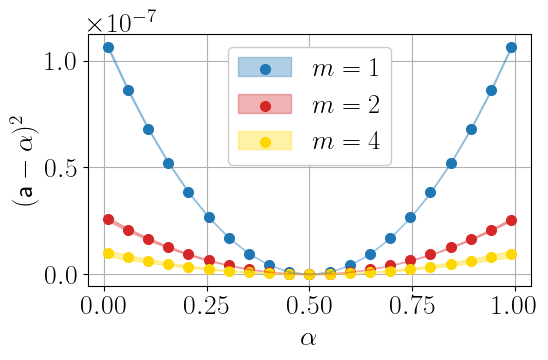

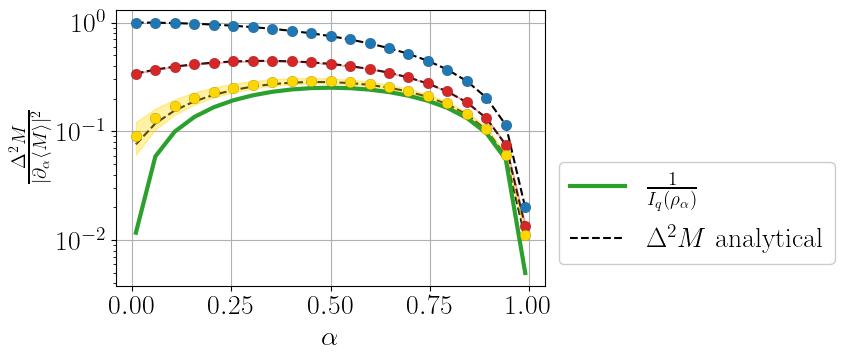

In [16]:
# path_fig = r"/home/kardashin/Work/QCNN-var/Results/Schwinger/"
# file_info = r"schwinger-n=%d-c=%d-m=%s-w_ls=%.1f-w_var=%.4f" %(n_inp, n_copies, "[(0),(0,4),4]", w_ls, w_var)

plt.figure(figsize=(6, 4))
p0 = plt.scatter(labels_test, bias_mean_0, linewidth=2, zorder=2)
p04 = plt.scatter(labels_test, bias_mean_04, color="tab:red", linewidth=2, zorder=2)
p0246 = plt.scatter(labels_test, bias_mean_0246, color="gold", linewidth=2, zorder=2)
f0 = plt.fill_between(labels_test, bias_mean_0 - bias_std_0, bias_mean_0 + bias_std_0, alpha=0.35, color="tab:blue", zorder=2)
f04 = plt.fill_between(labels_test, bias_mean_04 - bias_std_04, bias_mean_04 + bias_std_04, alpha=0.35, color="tab:red", zorder=2)
f0246 = plt.fill_between(labels_test, bias_mean_0246 - bias_std_0246, bias_mean_0246 + bias_std_0246, alpha=0.35, color="gold", zorder=2)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$(\mathsf{a} - \alpha)^2$")
# plt.legend()
plt.grid(zorder=1)
plt.legend([(p0, f0), (p04, f04), (p0246, f0246)], [r'$m=1$', r'$m=2$', r'$m=4$'], framealpha=1, fontsize=19) # , bbox_to_anchor=(0.75, 0.5)
# plt.legend([(p0, f0)], [r'$m=1$'], framealpha=1, bbox_to_anchor=(0.75, 0.5), fontsize=19)
# plt.yscale("log")
plt.tight_layout()
# plt.savefig(path_fig + "bfgs-" + file_info + "-mean-est.pdf", transparent=True, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8.85, 4))
p0 = plt.scatter(labels_test, disps_red_mean_0, s=60, linewidth=0.1, color="tab:blue", zorder=10, ec="black")
p04 = plt.scatter(labels_test, disps_red_mean_04, s=60, linewidth=0.1, color="tab:red", zorder=10, ec="black")
p0246 = plt.scatter(labels_test, disps_red_mean_0246, s=60, linewidth=0.1, color="gold", zorder=10, ec="black")
f0 = plt.fill_between(labels_test, disps_red_mean_0 - disps_red_std_0, disps_red_mean_0 + disps_red_std_0, alpha=0.35, zorder=9)
f04 = plt.fill_between(labels_test, disps_red_mean_04 - disps_red_std_04, disps_red_mean_04 + disps_red_std_04, alpha=0.35, color="tab:red", zorder=9)
f0246 = plt.fill_between(labels_test, disps_red_mean_0246 - disps_red_std_0246, disps_red_mean_0246 + disps_red_std_0246, alpha=0.35, color="gold", zorder=9)
pqfi = plt.plot(np.sort(labels_test), 1/QFIs, color="C2", label=r"$\frac{1}{I_q}$", linewidth=3, linestyle="solid", zorder=9) # , color="tab:blue"
# plt.plot(labels_test, 1/QFIs_an, color="black", linewidth=10)

# pcfi0 = plt.plot(labels_test, CCRBs_mean_0, linewidth=2, zorder=10, linestyle="--", color="tab:blue")
# pcfi04 = plt.plot(labels_test, CCRBs_mean_04, linewidth=2, zorder=10, linestyle="--", color="tab:red")
# pcfi0246 = plt.plot(labels_test, CCRBs_mean_0246, linewidth=2, zorder=10, linestyle="--", color="gold")

plt.plot(labels_test, var_lincomb(labels_test, p, n_inp, m=1), color="black", linestyle="--")
plt.plot(labels_test, var_lincomb(labels_test, p, n_inp, m=2), color="black", linestyle="--")
p_var_an = plt.plot(labels_test, var_lincomb(labels_test, p, n_inp, m=4), color="black", linestyle="--")

plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\frac{\Delta^2 M}{|\partial_\alpha \langle M \rangle |^2}$" )
plt.grid(zorder=1)
plt.yscale("log")
# plt.legend([(p0[0], f0), (p04[0], f04), (pqfi[0])], [r'$t=1$, QCNN', r'$t=2$, QCNN', r"$\frac{1}{I_q(\psi_m)}$"], framealpha=1)
# plt.legend([(pqfi[0])], [r"$\frac{1}{I_q(\rho_\alpha)}$"], framealpha=1)
plt.legend([(pqfi[0]), (p_var_an[0])], [r"$\frac{1}{I_q(\rho_\alpha)}$", r"$\Delta^2 M$ analytical"], framealpha=1, bbox_to_anchor=(1, 0.5))
plt.tight_layout()
# plt.savefig(path_fig + "bfgs-" + file_info + "-mean-var.pdf", transparent=True, bbox_inches='tight')
plt.show()

/tmp/ipykernel_3066954/4259223768.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


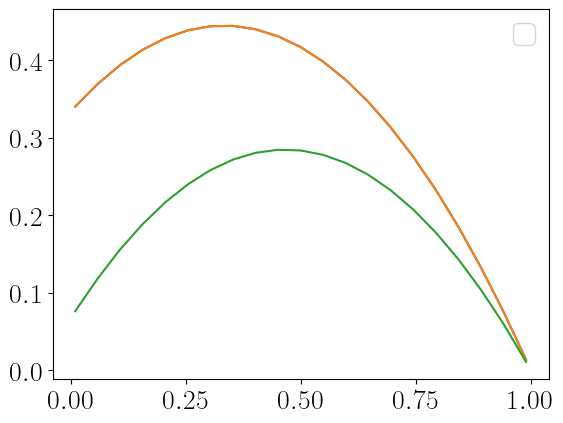

In [123]:
p = 1
n = 4
m = 2

QFIs_an = qfi_lincomb(labels_test, p, n)
CFIs_an = cfi_lincomb(labels_test, p, n, m)
vars_an = var_lincomb(labels_test, p, n, m)

plt.plot(labels_test, vars_an, color="C0")
# plt.plot(labels_test, (1 + labels_test)*(1 - labels_test)/4, color="C0")
# plt.plot(labels_test, var_n2m2p(labels_test, p), color="C0")
plt.plot(labels_test, 1/CFIs_an, color="C1")
plt.plot(labels_test, 1/QFIs_an, color="C2")
plt.legend()

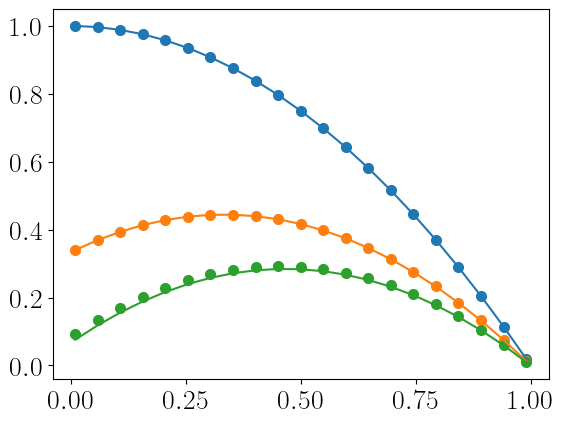

In [136]:
plt.scatter(labels_test, disps_red_mean_0, linewidth=2)
plt.plot(labels_test, var_lincomb(labels_test, p, n_inp, m=1))

plt.scatter(labels_test, disps_red_mean_04, linewidth=2)
plt.plot(labels_test, var_lincomb(labels_test, p, n_inp, m=2))

plt.scatter(labels_test, disps_red_mean_0246, linewidth=2)
plt.plot(labels_test, var_lincomb(labels_test, p, n_inp, m=4))

# $n=4$

In [219]:
n_inp = 4
n_copies= 1
n_runs = 10
w_ls = 1
w_var = 1e-4
dm_info = "ghz_pm"
p = 1/4
ansatz_name = "qcnn_schwinger"
ansatz_info = ""
U_info = "identity"

In [220]:
n_meas_list = [0]

path = f"/home/kardashin/Work/QCNN-var/Results/Linear_combination/QCNN/"
info = f"{dm_info}-{ansatz_name}{ansatz_info}-U={U_info}-" + ("n=%d-c=%d-m=%s-r=%d-w_ls=%.1f-w_var=%.4f-p=%.2f" %(n_inp, n_copies, n_meas_list, n_runs, w_ls, w_var, p)).replace(" ", "")

with open(path + info + ".dict", 'rb') as fp:
    data_dict_loaded = pickle.load(fp)

labels_test = data_dict_loaded["labels_test"]
expecs_list_0 = data_dict_loaded["expecs_list"]
expecs_der_list_0 = data_dict_loaded["expecs_der_list"]
disps_list_0 = data_dict_loaded["disps_list"]
QFIs = data_dict_loaded["QFIs"]
CFIs_list_0 = data_dict_loaded["CFIs_list"]

bias_mean_0 =  np.mean((labels_test - expecs_list_0)**2, axis=0)
bias_std_0 =  np.std((labels_test - expecs_list_0)**2, axis=0)
disps_red_mean_0 = np.mean(disps_list_0/expecs_der_list_0**2, axis=0)
disps_red_std_0 = np.std(disps_list_0/expecs_der_list_0**2, axis=0)
CCRBs_mean_0 = np.mean(1/CFIs_list_0, axis=0)
CCRBs_std_0 = np.std(1/CFIs_list_0, axis=0)

In [223]:
n_meas_list = [0, 1]

path = f"/home/kardashin/Work/QCNN-var/Results/Linear_combination/QCNN/"
info = f"{dm_info}-{ansatz_name}{ansatz_info}-U={U_info}-" + ("n=%d-c=%d-m=%s-r=%d-w_ls=%.1f-w_var=%.4f-p=%.2f" %(n_inp, n_copies, n_meas_list, n_runs, w_ls, w_var, p)).replace(" ", "")

with open(path + info + ".dict", 'rb') as fp:
    data_dict_loaded = pickle.load(fp)

labels_test = data_dict_loaded["labels_test"]
expecs_list_01 = data_dict_loaded["expecs_list"]
expecs_der_list_01 = data_dict_loaded["expecs_der_list"]
disps_list_01 = data_dict_loaded["disps_list"]
QFIs = data_dict_loaded["QFIs"]
CFIs_list_01 = data_dict_loaded["CFIs_list"]

bias_mean_01 =  np.mean((labels_test - expecs_list_01)**2, axis=0)
bias_std_01 =  np.std((labels_test - expecs_list_01)**2, axis=0)
disps_red_mean_01 = np.mean(disps_list_01/expecs_der_list_01**2, axis=0)
disps_red_std_01 = np.std(disps_list_01/expecs_der_list_01**2, axis=0)
CCRBs_mean_01 = np.mean(1/CFIs_list_01, axis=0)
CCRBs_std_01 = np.std(1/CFIs_list_01, axis=0)

In [224]:
n_meas_list = [0, 1, 2]

path = f"/home/kardashin/Work/QCNN-var/Results/Linear_combination/QCNN/"
info = f"{dm_info}-{ansatz_name}{ansatz_info}-U={U_info}-" + ("n=%d-c=%d-m=%s-r=%d-w_ls=%.1f-w_var=%.4f-p=%.2f" %(n_inp, n_copies, n_meas_list, n_runs, w_ls, w_var, p)).replace(" ", "")

with open(path + info + ".dict", 'rb') as fp:
    data_dict_loaded = pickle.load(fp)

labels_test = data_dict_loaded["labels_test"]
expecs_list_012 = data_dict_loaded["expecs_list"]
expecs_der_list_012 = data_dict_loaded["expecs_der_list"]
disps_list_012 = data_dict_loaded["disps_list"]
QFIs = data_dict_loaded["QFIs"]
CFIs_list_012 = data_dict_loaded["CFIs_list"]

bias_mean_012 =  np.mean((labels_test - expecs_list_012)**2, axis=0)
bias_std_012 =  np.std((labels_test - expecs_list_012)**2, axis=0)
disps_red_mean_012 = np.mean(disps_list_012/expecs_der_list_012**2, axis=0)
disps_red_std_012 = np.std(disps_list_012/expecs_der_list_012**2, axis=0)
CCRBs_mean_012 = np.mean(1/CFIs_list_012, axis=0)
CCRBs_std_012 = np.std(1/CFIs_list_012, axis=0)

In [225]:
n_meas_list = [0, 1, 2, 3]

path = f"/home/kardashin/Work/QCNN-var/Results/Linear_combination/QCNN/"
info = f"{dm_info}-{ansatz_name}{ansatz_info}-U={U_info}-" + ("n=%d-c=%d-m=%s-r=%d-w_ls=%.1f-w_var=%.4f-p=%.2f" %(n_inp, n_copies, n_meas_list, n_runs, w_ls, w_var, p)).replace(" ", "")

with open(path + info + ".dict", 'rb') as fp:
    data_dict_loaded = pickle.load(fp)

labels_test = data_dict_loaded["labels_test"]
expecs_list_0123 = data_dict_loaded["expecs_list"]
expecs_der_list_0123 = data_dict_loaded["expecs_der_list"]
disps_list_0123 = data_dict_loaded["disps_list"]
QFIs = data_dict_loaded["QFIs"]
CFIs_list_0123 = data_dict_loaded["CFIs_list"]

bias_mean_0123 =  np.mean((labels_test - expecs_list_0123)**2, axis=0)
bias_std_0123 =  np.std((labels_test - expecs_list_0123)**2, axis=0)
disps_red_mean_0123 = np.mean(disps_list_0123/expecs_der_list_0123**2, axis=0)
disps_red_std_0123 = np.std(disps_list_0123/expecs_der_list_0123**2, axis=0)
CCRBs_mean_0123 = np.mean(1/CFIs_list_0123, axis=0)
CCRBs_std_0123 = np.std(1/CFIs_list_0123, axis=0)

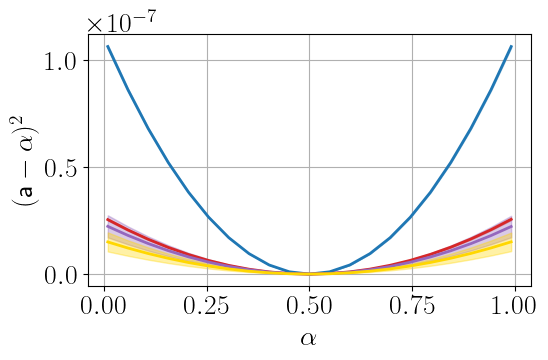

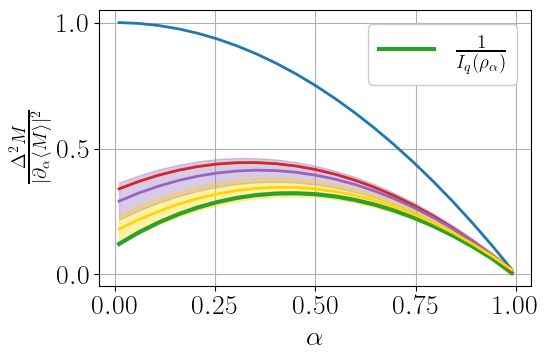

In [228]:
# path_fig = r"/home/kardashin/Work/QCNN-var/Results/Schwinger/"
# file_info = r"schwinger-n=%d-c=%d-m=%s-w_ls=%.1f-w_var=%.4f" %(n_inp, n_copies, "[(0),(0,4),4]", w_ls, w_var)

plt.figure(figsize=(6, 4))
p0 = plt.plot(labels_test, bias_mean_0, linewidth=2)
p01 = plt.plot(labels_test, bias_mean_01, color="tab:red", linewidth=2)
p012 = plt.plot(labels_test, bias_mean_012, color="tab:purple", linewidth=2)
p0123 = plt.plot(labels_test, bias_mean_0123, color="gold", linewidth=2)
f0 = plt.fill_between(labels_test, bias_mean_0 - bias_std_0, bias_mean_0 + bias_std_0, alpha=0.35, color="tab:blue")
f01 = plt.fill_between(labels_test, bias_mean_01 - bias_std_01, bias_mean_01 + bias_std_01, alpha=0.35, color="tab:red")
f012 = plt.fill_between(labels_test, bias_mean_012 - bias_std_012, bias_mean_012 + bias_std_012, alpha=0.35, color="tab:purple")
f0123 = plt.fill_between(labels_test, bias_mean_0123 - bias_std_0123, bias_mean_0123 + bias_std_0123, alpha=0.35, color="gold")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$(\mathsf{a} - \alpha)^2$")
# plt.legend()
plt.grid()
# plt.legend([(p0[0], f0), (p04[0], f04)], [r'$t=1$, MSE:%.2f'%mse_0, r'$t=2$, MSE:%.2f'%mse_04], framealpha=1)
# plt.legend([(p0[0], f0), (p04[0], f04), (phea4[0], fhea4)], [r'QCNN, $l=1$', r'QCNN, $l=2$', r'HEA, $l=4$'], framealpha=1, bbox_to_anchor=(0.75, 0.5), fontsize=19)
# plt.yscale("log")
plt.tight_layout()
# plt.savefig(path_fig + "bfgs-" + file_info + "-mean-est.pdf", transparent=True, bbox_inches='tight')
plt.show()

plt.figure(figsize=(6, 4))
p0 = plt.plot(labels_test, disps_red_mean_0, linewidth=2, zorder=10)
p01 = plt.plot(labels_test, disps_red_mean_01, linewidth=2, color="tab:red", zorder=10)
p012 = plt.plot(labels_test, disps_red_mean_012, linewidth=2, color="tab:purple", zorder=10)
p0123 = plt.plot(labels_test, disps_red_mean_0123, linewidth=2, color="gold", zorder=10)
f0 = plt.fill_between(labels_test, disps_red_mean_0 - disps_red_std_0, disps_red_mean_0 + disps_red_std_0, alpha=0.35, zorder=9)
f01 = plt.fill_between(labels_test, disps_red_mean_01 - disps_red_std_01, disps_red_mean_01 + disps_red_std_01, alpha=0.35, color="tab:red", zorder=9)
f012 = plt.fill_between(labels_test, disps_red_mean_012 - disps_red_std_012, disps_red_mean_012 + disps_red_std_012, alpha=0.35, color="tab:purple", zorder=9)
f0123 = plt.fill_between(labels_test, disps_red_mean_0123 - disps_red_std_0123, disps_red_mean_0123 + disps_red_std_0123, alpha=0.35, color="gold", zorder=9)
pqfi = plt.plot(np.sort(labels_test), 1/QFIs, color="C2", label=r"$\frac{1}{I_q}$", linewidth=3, linestyle="solid", zorder=9) # , color="tab:blue"
# plt.plot(labels_test, 1/QFIs_an, color="black", linewidth=10)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\frac{\Delta^2 M}{|\partial_\alpha \langle M \rangle |^2}$" )
plt.grid(zorder=1)
# plt.yscale("log")
# plt.legend([(p0[0], f0), (p04[0], f04), (pqfi[0])], [r'$t=1$, QCNN', r'$t=2$, QCNN', r"$\frac{1}{I_q(\psi_m)}$"], framealpha=1)
plt.legend([(pqfi[0])], [r"$\frac{1}{I_q(\rho_\alpha)}$"], framealpha=1)
plt.tight_layout()
# plt.savefig(path_fig + "bfgs-" + file_info + "-mean-var.pdf", transparent=True, bbox_inches='tight')
plt.show()

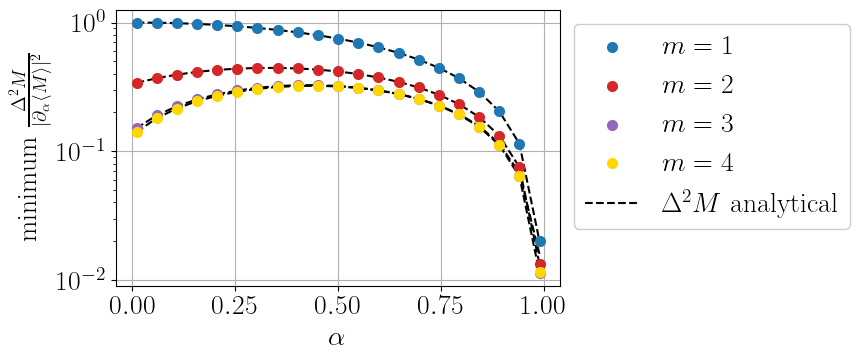

In [245]:
disps_red_min_0 = np.min(disps_list_0/expecs_der_list_0**2, axis=0)
disps_red_min_01 = np.min(disps_list_01/expecs_der_list_01**2, axis=0)
disps_red_min_012 = np.min(disps_list_012/expecs_der_list_012**2, axis=0)
disps_red_min_0123 = np.min(disps_list_0123/expecs_der_list_0123**2, axis=0)


plt.figure(figsize=(9, 4))
p0 = plt.scatter(labels_test, disps_red_min_0, linewidth=2, zorder=10)
p01 = plt.scatter(labels_test, disps_red_min_01, linewidth=2, color="tab:red", zorder=10)
p012 = plt.scatter(labels_test, disps_red_min_012, linewidth=2, color="tab:purple", zorder=10)
p0123 = plt.scatter(labels_test, disps_red_min_0123, linewidth=2, color="gold", zorder=10)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"minimum $\frac{\Delta^2 M}{|\partial_\alpha \langle M \rangle |^2}$" )
plt.grid(zorder=1)

plt.plot(labels_test, var_lincomb(labels_test, p, n_inp, m=1), color="black", linestyle="--")
plt.plot(labels_test, var_lincomb(labels_test, p, n_inp, m=2), color="black", linestyle="--")
plt.plot(labels_test, var_lincomb(labels_test, p, n_inp, m=3), color="black", linestyle="--")
p_var_an = plt.plot(labels_test, var_lincomb(labels_test, p, n_inp, m=4), color="black", linestyle="--")

plt.grid(zorder=1)
# plt.legend([(p0[0], f0), (p04[0], f04), (pqfi[0])], [r'$t=1$, QCNN', r'$t=2$, QCNN', r"$\frac{1}{I_q(\psi_m)}$"], framealpha=1)
# plt.legend([(pqfi[0])], [r"$\frac{1}{I_q(\rho_\alpha)}$"], framealpha=1)
# plt.legend([(p0[0], f0), (p04[0], f04), (phea4[0], fhea4)], [r'QCNN, $l=1$', r'QCNN, $l=2$', r'HEA, $l=4$'], framealpha=1, bbox_to_anchor=(0.75, 0.5), fontsize=19)
plt.legend([p0, p01, p012, p0123, p_var_an[0]], [r"$m=1$", r"$m=2$", r"$m=3$", r"$m=4$", r"$\Delta^2 M$ analytical"], framealpha=1, bbox_to_anchor=(1, 1))
plt.yscale("log")
plt.tight_layout()
# plt.savefig(path_fig + "bfgs-" + file_info + "-mean-var.pdf", transparent=True, bbox_inches='tight')
plt.show()

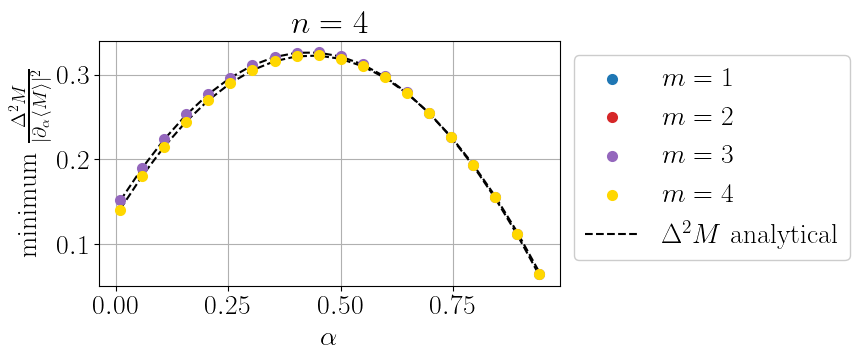

In [252]:
disps_red_min_0 = np.min(disps_list_0/expecs_der_list_0**2, axis=0)
disps_red_min_01 = np.min(disps_list_01/expecs_der_list_01**2, axis=0)
disps_red_min_012 = np.min(disps_list_012/expecs_der_list_012**2, axis=0)
disps_red_min_0123 = np.min(disps_list_0123/expecs_der_list_0123**2, axis=0)

fin = -1

plt.figure(figsize=(9, 4))
# p0 = plt.scatter(labels_test[:fin], disps_red_min_0[:fin], linewidth=2, zorder=10)
# p01 = plt.scatter(labels_test[:fin], disps_red_min_01[:fin], linewidth=2, color="tab:red", zorder=10)
p012 = plt.scatter(labels_test[:fin], disps_red_min_012[:fin], linewidth=2, color="tab:purple", zorder=10)
p0123 = plt.scatter(labels_test[:fin], disps_red_min_0123[:fin], linewidth=2, color="gold", zorder=10)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"minimum $\frac{\Delta^2 M}{|\partial_\alpha \langle M \rangle |^2}$" )
# plt.plot(labels_test[:fin], var_lincomb(labels_test, p, n_inp, m=1)[:fin], color="black", linestyle="--")
# plt.plot(labels_test[:fin], var_lincomb(labels_test, p, n_inp, m=2)[:fin], color="black", linestyle="--")
plt.plot(labels_test[:fin], var_lincomb(labels_test, p, n_inp, m=3)[:fin], color="black", linestyle="--")
p_var_an = plt.plot(labels_test[:fin], var_lincomb(labels_test, p, n_inp, m=4)[:fin], color="black", linestyle="--")
plt.title(fr"$n={n_inp}$")
plt.legend([p0, p01, p012, p0123, p_var_an[0]], [r"$m=1$", r"$m=2$", r"$m=3$", r"$m=4$", r"$\Delta^2 M$ analytical"], framealpha=1, bbox_to_anchor=(1, 1))
# plt.yscale("log")
plt.grid(zorder=1)
plt.tight_layout()
# plt.savefig(path_fig + "bfgs-" + file_info + "-mean-var.pdf", transparent=True, bbox_inches='tight')
plt.show()